In [42]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from Manage_data.db_manager import get_data
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
symbols_dict = {
    'tech_symbols' : [
        "AAPL",   # Apple Inc.
        "NVDA",   # Nvidia Corporation
        "MSFT",   # Microsoft Corporation
        "GOOGL",  # Alphabet Inc. (classe A)
        "AMZN",   # Amazon.com Inc.
        "META",   # Meta Platforms Inc.
        "TSLA",   # Tesla Inc.
        "AVGO",   # Broadcom Inc.
        "TCEHY",  # Tencent Holdings Ltd.
        "TSM"     # Taiwan Semiconductor Manufacturing Company
    ],

    'commodities_symbols' : [
        "GC=F",   # Or (Gold) - utilisé pour les semi-conducteurs et connecteurs électroniques
        "SI=F",   # Argent (Silver) - utilisé dans les circuits imprimés et batteries
        "HG=F",   # Cuivre (Copper) - essentiel pour le câblage et les cartes mères
        #"AL=F",   # Aluminium (Aluminum) - utilisé dans la fabrication des boîtiers d’ordinateurs et de smartphones
        "PL=F",   # Platine (Platinum) - utilisé dans certains composants électroniques et piles à combustible
        "PA=F",   # Palladium (Palladium) - essentiel pour la fabrication de capteurs et composants électroniques
        #"LMCADS03=GB",  # Cobalt (Cobalt) - indispensable pour les batteries lithium-ion
        #"LTHM",   # Lithium (Lithium) - essentiel pour les batteries des véhicules électriques et smartphones
        #"FEF=F",  # Minerai de fer (Iron Ore) - utilisé dans la construction d’équipements et de serveurs
        #"ZNCADS03=GB"   # Zinc (Zinc) - utilisé pour le revêtement anticorrosion et certains alliages électroniques
    ],

    'telecom_symbols' : [
        "T",      # AT&T Inc.
        "VZ",     # Verizon Communications Inc.
        "TMUS",   # T-Mobile US, Inc.
        "CSCO",   # Cisco Systems, Inc.
        "NOK",    # Nokia Corporation
        #"ERIC",   # Ericsson (Telefonaktiebolaget LM Ericsson)
        "QCOM",   # Qualcomm Incorporated
        #"CHL",    # China Mobile Limited
        "NTTYY",  # Nippon Telegraph and Telephone Corporation (NTT)
        #"ORAN"    # Orange S.A.
    ]
}

all_symbols = [symbol for category in symbols_dict.values() for symbol in category]
print(all_symbols)

['AAPL', 'NVDA', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'AVGO', 'TCEHY', 'TSM', 'GC=F', 'SI=F', 'HG=F', 'PL=F', 'PA=F', 'T', 'VZ', 'TMUS', 'CSCO', 'NOK', 'QCOM', 'NTTYY']


In [44]:
df = get_data(all_symbols)
df.head()

Adding Symbol: AAPL
entry already exists or no title
Adding Symbol: NVDA
entry already exists or no title
Adding Symbol: MSFT
entry already exists or no title
Adding Symbol: GOOGL
entry already exists or no title
Adding Symbol: AMZN
entry already exists or no title
Adding Symbol: META
entry already exists or no title
Adding Symbol: TSLA
entry already exists or no title
Adding Symbol: AVGO
entry already exists or no title
Adding Symbol: TCEHY
entry already exists or no title
Adding Symbol: TSM
entry already exists or no title
Adding Symbol: GC=F
entry already exists or no title
Adding Symbol: SI=F
entry already exists or no title
Adding Symbol: HG=F
entry already exists or no title
Adding Symbol: PL=F
entry already exists or no title
Adding Symbol: PA=F
entry already exists or no title
Adding Symbol: T
entry already exists or no title
Adding Symbol: VZ
entry already exists or no title
Adding Symbol: TMUS
entry already exists or no title
Adding Symbol: CSCO
entry already exists or no tit

,Title,Date,Open,High,Low,Close,Adj_close,Volume
0,META,2025-02-28,658.04,669.63,642.60,668.20,668.20,17517800.0
1,META,2025-02-27,682.45,688.65,657.57,658.24,658.24,12500000.0
2,META,2025-02-26,659.65,683.01,658.00,673.70,673.70,14488700.0
3,META,2025-02-25,665.97,668.00,641.86,657.50,657.50,20579700.0
4,META,2025-02-24,686.28,687.27,662.45,668.13,668.13,15677000.0


In [45]:
df.dtypes

Title                object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_close           float64
Volume              float64
dtype: object

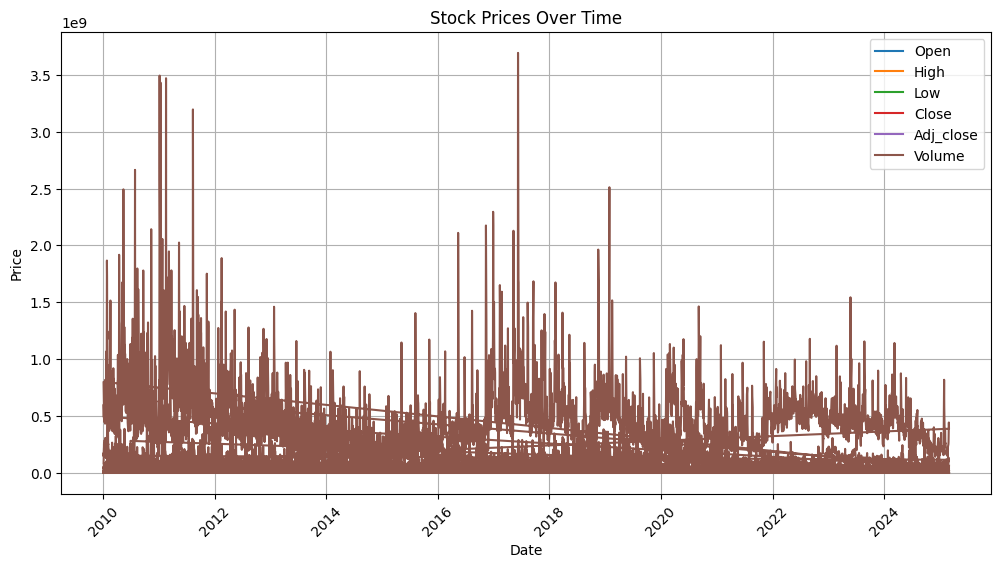

In [46]:
columns = [col for col in df.select_dtypes(include=['float'])]

plt.figure(figsize=(12, 6))

for col in columns:
    plt.plot(df["Date"], df[col], linestyle="-", label=col)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Prices Over Time")
plt.legend()  # Afficher la légende
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [47]:
df["Date"] = df["Date"].dt.strftime("%Y/%-m/%-d 0:00")
df = df.rename(columns={"Date": "date"})
df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)
df = df.pivot_table(index="date", columns="Title", values="Adj_close")
df = df.rename(columns={"META":"OT"})


# df["Volume"] = df["Volume"].astype(float)

for var in df.columns:
    if var in ['date', 'Title']: continue
    df[var] = df[var].pct_change()

df.dropna(inplace=True)


/tmp/ipykernel_193420/4249056433.py:12: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[var] = df[var].pct_change()


In [48]:
dataset_dir = "../dataset/stock_var"
os.makedirs(dataset_dir, exist_ok=True)
csv_path = os.path.join(dataset_dir, "stock.csv")
df.to_csv(csv_path, index=True)
df.to_csv()

'date,AAPL,AMZN,AVGO,CSCO,GC=F,GOOGL,HG=F,OT,MSFT,NOK,NTTYY,NVDA,PA=F,PL=F,QCOM,SI=F,T,TCEHY,TMUS,TSLA,TSM,VZ\n2012/10/10 0:00,-0.028098344204716463,-0.02777777777777779,-0.059288537549407105,-0.03098373353989159,-0.00971637180567253,-0.02211690363349117,-0.016873187450566873,-0.10680054769511638,-0.017314189189189144,-0.05794776680535363,-0.007450331125827825,-0.033333333333333326,0.006988120195667413,-0.0028545941123996332,-0.034545044027997296,-0.023164473495599358,-0.00694444444444442,-0.012987012987012991,0.04499196572040698,-0.02577319587628868,-0.049781659388646204,0.010534846029173428\n2012/10/11 0:00,-0.020134228187919545,-0.0032653061224489077,0.0126050420168069,-0.0023980815347721673,0.0031760435571688284,0.009154550350026769,0.008045052292839916,0.005109862033725099,-0.0008594757198109315,-0.01926249135316338,0.011676396997498006,0.0,0.0015421389467191737,0.00662014671676503,-0.009354536950420878,-0.000792416282687225,-0.018356643356643332,-0.006578947368421018,-0.033316248